Data documentation: https://tidyr.tidyverse.org/reference/who.html

Directions: Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dataFrameFull = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [ ]:
dataFrameFull.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrameFull = dataFrameFull.drop(columns=['iso2', 'iso3'])
dataFrameFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

Question 1. We need to know what's included in this data.

1.How many countries are present?

2.What's the timespan of the data?

3.Does each country have a row for every year present?

4.Which countries are missing years?

5.How many rows have at least 1 non-null values across the columns 3-57?

In [ ]:
#1.How many countries are present?
countries_top_unique=dataFrameFull['country'].unique()
countCountry=len(countries_top_unique)

219


In [ ]:
print("Count of the countries : ", countCountry)

In [ ]:
# question 2
dataFrameFull['year']

0       1980
1       1981
2       1982
3       1983
4       1984
        ... 
7235    2009
7236    2010
7237    2011
7238    2012
7239    2013
Name: year, Length: 7240, dtype: int64

In [ ]:
print("Minimum year : ",dataFrameFull['year'].min())

1980

In [ ]:
print("Maximum year : ",dataFrameFull['year'].max())

2013

In [ ]:
unique_years = dataFrameFull['year'].unique()
grouped = dataFrameFull.groupby('country')
countries_with_missing_years = []

for country, group in grouped:
    year_group = group['year'].unique()
    if len(year_group) != len(unique_years):
        countries_with_missing_years.append(country)
        print(i+ " not having a year present.")

Zimbabwe not having a year present.
Zimbabwe not having a year present.
Zimbabwe not having a year present.
Zimbabwe not having a year present.
Zimbabwe not having a year present.
Zimbabwe not having a year present.
Zimbabwe not having a year present.
Zimbabwe not having a year present.
Zimbabwe not having a year present.


In [ ]:
# question 4
print("Countries with missing years : ",countries_with_missing_years)

Countries with missing years :  ['Bonaire, Saint Eustatius and Saba', 'Curacao', 'Montenegro', 'Netherlands Antilles', 'Serbia', 'Serbia & Montenegro', 'Sint Maarten (Dutch part)', 'South Sudan', 'Timor-Leste']


In [ ]:
#question 5 
selected_columns = dataFrameFull.iloc[:, 3:57]
not_null_values = selected_columns.notnull()
at_least_one_non_null = not_null_values.any(axis=1)
count = at_least_one_non_null.sum()
print("The number of rows with at least one non-null value across columns 3-57 is:", count)


The number of rows with at least one non-null value across columns 3-57 is: 7240


Question 2: Wide data isn't usually helpful.

Convert this to a long format with the following columns:

1. country
2. year
3. diagnosis method: mapping should be:
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
4. gender: male or female.
5. age: lower_age - higher_age, e.g., 0-14
6. number of cases

Note: You can use replace (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [ ]:
dataFrameFull.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Mapping for column values
category_mapping = {'newsp': 'Pulmonary Smear (+)',
                    'newsn': 'Pulmonary Smear (-)',
                    'newep': 'Extrapulmonary',
                    'newrel': 'Relapse'}

# Create age ranges
age_ranges = ['0-14', '35-54', '55-64']

# Melt the data frame to long format
melted_df = dataFrameFull.melt(id_vars=['country', 'year'], value_vars=['new_sp_m014', 'new_sp_f014', 'new_sn_m014', 'new_sn_f014', 'new_ep_m014', 'new_ep_f014', 'newrel_m014', 'newrel_f014'])

# Print the melted DataFrame
print(melted_df)


           country  year     variable   value
0      Afghanistan  1980  new_sp_m014     NaN
1      Afghanistan  1981  new_sp_m014     NaN
2      Afghanistan  1982  new_sp_m014     NaN
3      Afghanistan  1983  new_sp_m014     NaN
4      Afghanistan  1984  new_sp_m014     NaN
...            ...   ...          ...     ...
57915     Zimbabwe  2009  newrel_f014     NaN
57916     Zimbabwe  2010  newrel_f014     NaN
57917     Zimbabwe  2011  newrel_f014     NaN
57918     Zimbabwe  2012  newrel_f014     NaN
57919     Zimbabwe  2013  newrel_f014  1252.0

[57920 rows x 4 columns]


In [ ]:
# Split the variable column into diagnosis method and gender
melted_df[['diagnosis_method', 'gender']] = melted_df['variable'].str.extract(r'(.*)_(.*)', expand=True)

# Print the modified DataFrame
print(melted_df)


           country  year     variable   value diagnosis_method gender
0      Afghanistan  1980  new_sp_m014     NaN           new_sp   m014
1      Afghanistan  1981  new_sp_m014     NaN           new_sp   m014
2      Afghanistan  1982  new_sp_m014     NaN           new_sp   m014
3      Afghanistan  1983  new_sp_m014     NaN           new_sp   m014
4      Afghanistan  1984  new_sp_m014     NaN           new_sp   m014
...            ...   ...          ...     ...              ...    ...
57915     Zimbabwe  2009  newrel_f014     NaN           newrel   f014
57916     Zimbabwe  2010  newrel_f014     NaN           newrel   f014
57917     Zimbabwe  2011  newrel_f014     NaN           newrel   f014
57918     Zimbabwe  2012  newrel_f014     NaN           newrel   f014
57919     Zimbabwe  2013  newrel_f014  1252.0           newrel   f014

[57920 rows x 6 columns]


In [ ]:
# Drop the 'variable' column from the melted DataFrame
melted_df = melted_df.drop(columns=['variable'])




KeyError: ignored

In [ ]:
# Rename the 'value' column to 'number_of_cases'
melted_df.rename(columns={'value': 'number_of_cases'}, inplace=True)



In [ ]:
# Reorder columns to match the desired format
melted_df = melted_df[['country', 'year', 'diagnosis_method', 'gender', 'number_of_cases']]

# Print the modified DataFrame
print(melted_df)


           country  year diagnosis_method gender  number_of_cases
0      Afghanistan  1980           new_sp   m014              NaN
1      Afghanistan  1981           new_sp   m014              NaN
2      Afghanistan  1982           new_sp   m014              NaN
3      Afghanistan  1983           new_sp   m014              NaN
4      Afghanistan  1984           new_sp   m014              NaN
...            ...   ...              ...    ...              ...
57915     Zimbabwe  2009           newrel   f014              NaN
57916     Zimbabwe  2010           newrel   f014              NaN
57917     Zimbabwe  2011           newrel   f014              NaN
57918     Zimbabwe  2012           newrel   f014              NaN
57919     Zimbabwe  2013           newrel   f014           1252.0

[57920 rows x 5 columns]


Question 3: Create a graph that shows when countries started to report TB cases.

<ipython-input-24-bed28734e6d4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melted_df_group = melted_df.groupby(['year', 'country']).sum().reset_index()
<ipython-input-24-bed28734e6d4>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Set1')  # Choose the desired color map


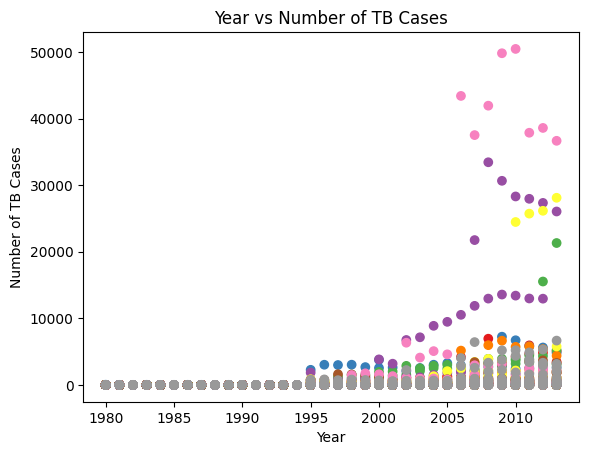

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Group the melted DataFrame by year and country, and calculate the sum of number_of_cases
melted_df_group = melted_df.groupby(['year', 'country']).sum().reset_index()

# Create a scatter plot with a different color scheme
color_map = cm.get_cmap('Set1')  # Choose the desired color map
plt.scatter(melted_df_group['year'], melted_df_group['number_of_cases'], c=melted_df_group['country'].astype('category').cat.codes, cmap=color_map)

# Set plot title, x-axis label, and y-axis label
plt.title('Year vs Number of TB Cases')
plt.xlabel('Year')
plt.ylabel('Number of TB Cases')

# Display the scatter plot
plt.show()
